In [78]:
import numpy as np
import pandas as pd
from time import time
from vislab import visuals as vs 
import matplotlib.pyplot as plt

In [79]:
data = pd.read_csv('datasal.csv',encoding='unicode_escape')

In [80]:
data.head(3)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K


In [81]:
# גיל -אדם שנמצא בגיל מסוים   
# מעמד העבודה - אדם שכיר או אדם עצמאי 
# רמת חינוך - רמת החינוך של אדם 
# רמת החינוך של אדם במספרים
# מצב משפחתי של אדם
# באיזה משרה אדם עוסק
# מצב זוגי של אדם
# גזע של האדם
# מין האדם
# רווח הון - רווח שנוצר מעליית ארכו של נכס מסוים, כלומר ההפרש בין מחיר המכירה לבין מחיר הקנייה
# הפסד הון - ההפך 
# מספר שעות בכל שבוע 
# מדינות אם 

In [82]:
data.shape

(45222, 14)

In [83]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [84]:
# a - 37
# b - 13
# c - No: because of the MAX row, usually Normal distribution is between 25% to 75% but here is 0.
# d - yes: because Normal distribution is between 25% to 75% and here it is 40 between 45.

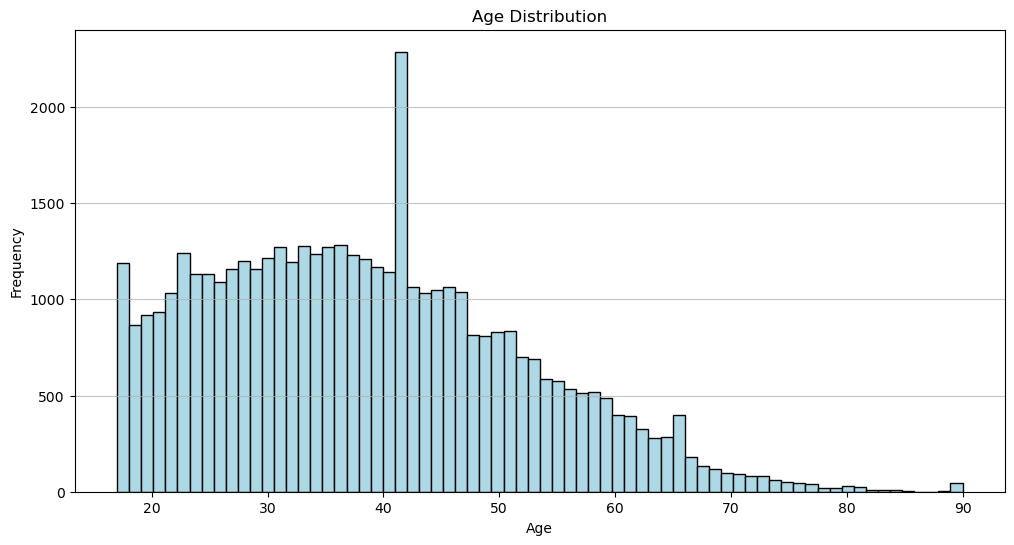

In [85]:
plt.figure(figsize=(12, 6))
plt.hist(data['age'], bins=70, color='lightblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [86]:
num_people_over_50k = (data['income'] == '>50K').sum()
total_people = len(data)
percentage_over_50k = (num_people_over_50k / total_people) * 100
percentage_over_50k

24.78439697492371

In [87]:
divorced_count = len(data[data['marital-status'].str.contains('Divorced')])
divorced_count

6297

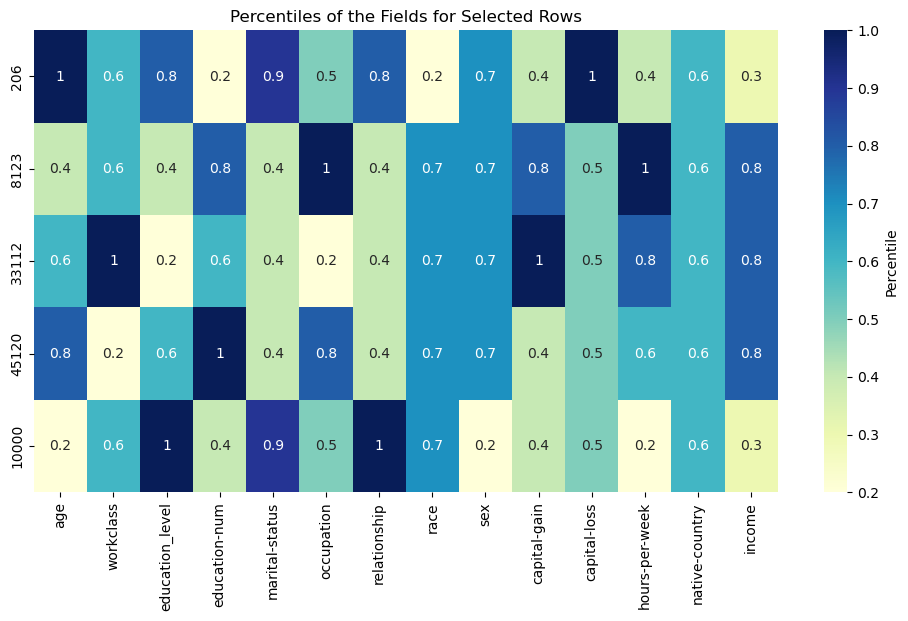

In [88]:
import seaborn as sns
selected_rows = data.loc[[206, 8123, 33112, 45120, 10000]]
percentiles = selected_rows.rank(pct=True)
plt.figure(figsize=(12, 6))
sns.heatmap(percentiles, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Percentile'})
plt.title('Percentiles of the Fields for Selected Rows')
plt.show()

In [89]:
# 1. לשתי השורות יש אחוזונים גבוהים יחסית לשדה 'גיל', מה שמצביע על כך שהפרטים בשורות אלה הם בין המשתתפים המבוגרים יותר במערך הנתונים
# ערכי ה-'education-num' עבור קווים אלה נמצאים גם הם באחוזונים גבוהים יותר, מה שמצביע על כך שאנשים אלו קיבלו חינוך גבוה יחסית
# לשתי השורות יש אחוזונים נמוכים ב'רווח הון', מה שמציין שרווחי ההון שלהם נמצאים בצד הנמוך בהשוואה לשאר מערך הנתונים
# גם השדות 'הפסד הון' ו'שעות שבוע' נמצאים בטווח אחוזון דומה עבור שני קווים אלה
# 2. אחוז ה'גיל' עבור שתי השורות נמצא בצד התחתון, מה שמצביע על כך שאנשים אלה צעירים יחסית לאחרים במערך הנתונים
# ערכי ה-'Education-num' עבור שורות אלה נמצאים גם הם באחוזונים נמוכים יותר, מה שעשוי לרמוז על רמת השכלה נמוכה יותר
# לשתי השורות יש אחוזונים נמוכים בשדות 'רווח הון' ו'הפסד הון', מה שמצביע על ערכים נמוכים יותר במדדים פיננסיים אלו
# לשדה 'שעות שבוע' עבור שני השורות יש אחוזון גבוה, מה שמרמז שאנשים אלה עובדים יותר שעות שבועיות בהשוואה לרוב הנתונים במערך הנתונים

In [90]:
income_raw = data[['income']]
features_raw = data.drop('income', axis=1)

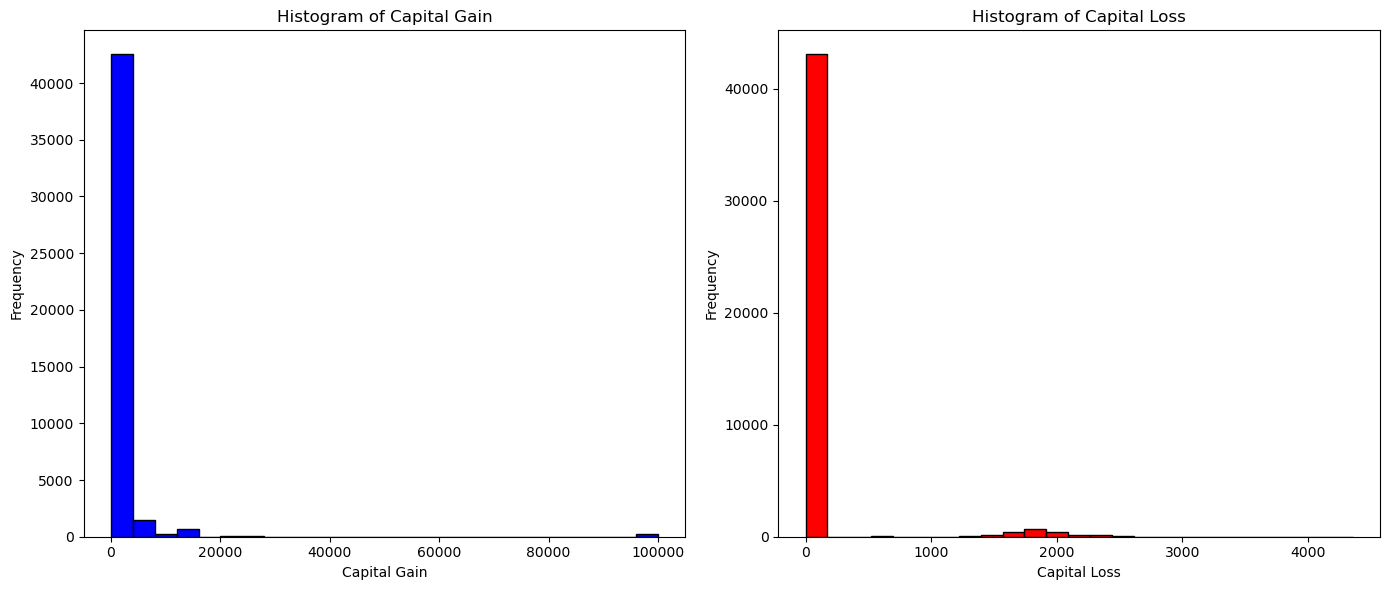

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

features_raw['capital-gain'].plot(kind='hist', ax=ax[0], color='blue', edgecolor='black', bins=25)
ax[0].set_title('Histogram of Capital Gain')
ax[0].set_xlabel('Capital Gain')
ax[0].set_ylabel('Frequency')

features_raw['capital-loss'].plot(kind='hist', ax=ax[1], color='red', edgecolor='black', bins=25)
ax[1].set_title('Histogram of Capital Loss')
ax[1].set_xlabel('Capital Loss')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

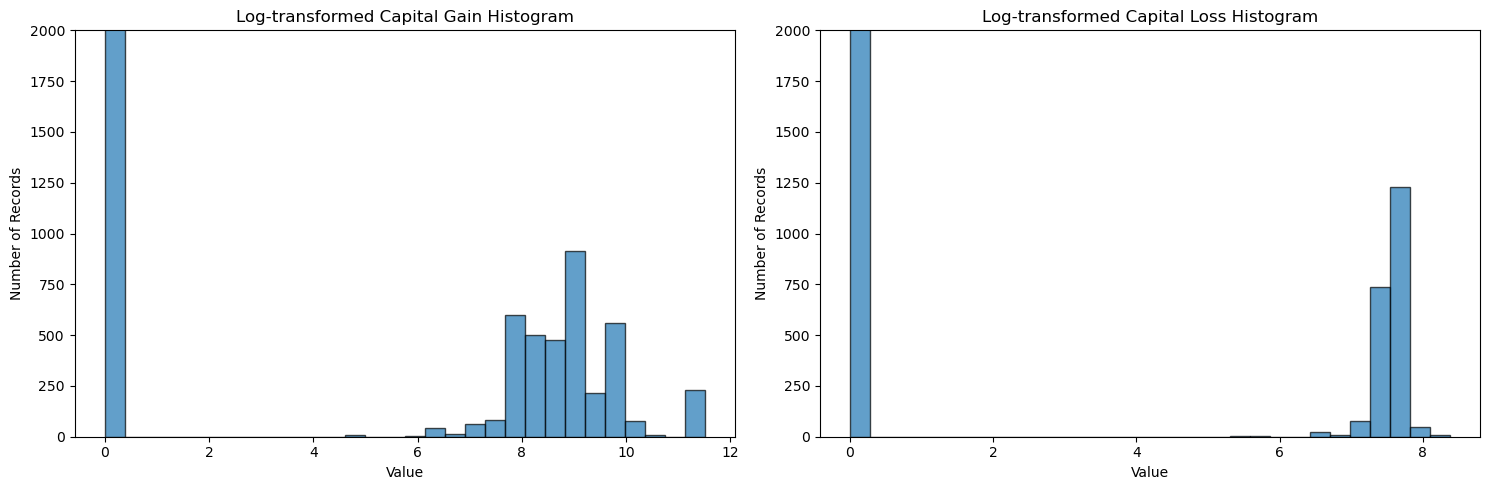

In [92]:
skewed = ['capital-gain', 'capital-loss']

features_log_transformed = pd.DataFrame(features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(features_log_transformed['capital-gain'], bins=30, edgecolor='k', alpha=0.7)
plt.title("Log-transformed Capital Gain Histogram")
plt.xlabel("Value")
plt.ylabel("Number of Records")
plt.ylim(0, 2000)

plt.subplot(1, 2, 2)
plt.hist(features_log_transformed['capital-loss'], bins=30, edgecolor='k', alpha=0.7)
plt.title("Log-transformed Capital Loss Histogram")
plt.xlabel("Value")
plt.ylabel("Number of Records")
plt.ylim(0, 2000)

plt.tight_layout()
plt.show()

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_log_minmax_transform = pd.DataFrame(data=features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])
features_log_minmax_transform.head(7)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba
5,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,0.397959,United-States
6,0.438356,Private,9th,0.266667,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.0,0.153061,Jamaica


In [94]:
features_final = pd.get_dummies(features_log_minmax_transform)

In [95]:
features_final.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
 income = income_raw["income"].apply(lambda x: 1 if x.strip() == '>50K' else 0)

In [97]:
income.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_final, income, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36177, 103), (9045, 103), (36177,), (9045,))

In [99]:
from sklearn.metrics import fbeta_score, accuracy_score
import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    results = {}
    
    start = time.time()
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time.time()
    
    results['train_time'] = end - start
    
    start = time.time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time.time()
    
    results['pred_time'] = end - start
    
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
    
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
    
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
    
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    
    return results

AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
SGDClassifier trained on 361 samples.
SGDClassifier trained on 3617 samples.
SGDClassifier trained on 36177 samples.


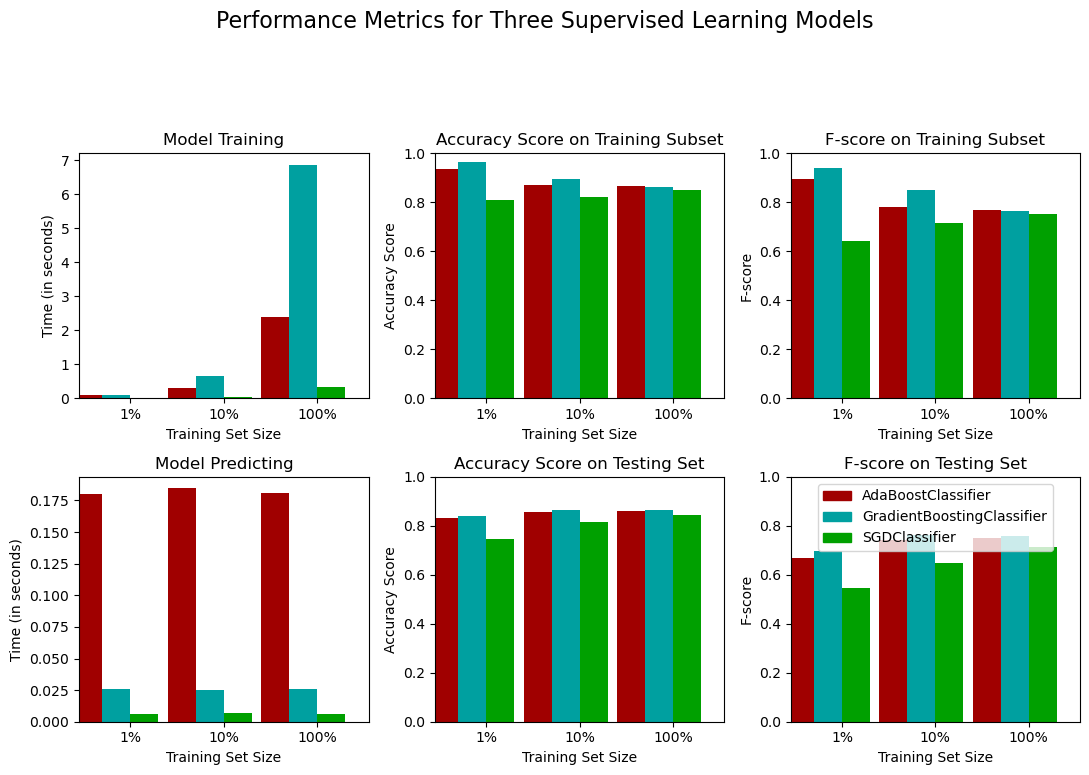

In [100]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier

clf_A = AdaBoostClassifier(random_state=0)
clf_B = GradientBoostingClassifier(random_state=0)
clf_C = SGDClassifier(random_state=0)

samples_100 = len(y_train)
samples_10 = int(len(y_train) * 0.1)
samples_1 = int(len(y_train) * 0.01)

results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)
        
vs.evaluate(results) 

In [101]:
# 1. ל-SGDClassifier יש את זמן החיזוי הקצר ביותר כאשר הוא מאומן על 100% מהנתונים, מה שהופך אותו למהיר ביותר מבין שלושת האלגוריתמים במונחים של יצירת תחזיות.
# 2. ל- GradientBoostingClassifier יש את הדיוק הגבוה ביותר ואת ציון F-beta כאשר הוא מאומן על 100% מהנתונים.

In [102]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

data_for_clustering = features_final.head(10000)

n_components_range = list(range(2, 8))

silhouette_scores = []

for n_components in n_components_range:
   
    gmm = GaussianMixture(n_components=n_components, random_state=0).fit(data_for_clustering)
    cluster_labels = gmm.predict(data_for_clustering)
    
    silhouette_scores.append(silhouette_score(data_for_clustering, cluster_labels))

optimal_components = n_components_range[silhouette_scores.index(max(silhouette_scores))]
optimal_silhouette_score = max(silhouette_scores)

optimal_components, optimal_silhouette_score

(3, 0.16104697196439363)

In [103]:
from sklearn.cluster import KMeans

kmeans_silhouette_scores = []

for k in range(2, 8):
    
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_for_clustering)
    cluster_labels = kmeans.predict(data_for_clustering)
    
    kmeans_silhouette_scores.append(silhouette_score(data_for_clustering, cluster_labels))

optimal_k = range(2, 8)[kmeans_silhouette_scores.index(max(kmeans_silhouette_scores))]
optimal_kmeans_silhouette_score = max(kmeans_silhouette_scores)

optimal_k, optimal_kmeans_silhouette_score

(3, 0.16470528226679215)